<h1>Entrenamiento del modelo empleando la API Callbacks de Keras:</h1>
</br>
Callbacks es una herramienta que permite personalizar el comportamiento de un modelo en diferentes etapas: entrenamiento (<b>model.fit</b>), evaluación (<b>model.evaluate</b>) o inferencias (<b>model.predict</b>).
</br>

<ul>
  <li> <b>EarlyStopping</b> Detiene el entrenamiento cuando se cumple la condición especificada.
  <ul>
    <li>
        <i>monitor</i> Métrica que se va a monitorear. Por default <b>val_loss</b>
    </li>
    <li>
      <i>patience</i> Número de épocas en las que el modelo no mejora durante el entrenamiento.
    </li>
    <li>
      <i>min_delta</i> Valor que indica el cambio mínimo que se espera tenga el modelo.
    </li>
  </ul>
  <li> <b>ModelCheckpoint</b> Salva el modelo después de cada época.
  <table>
    <tr>
      <td> <i>filepath</i> </td>
      <td> string </td>
      <td> Ruta y nombre del modelo <td>
    </tr>
    <tr>
      <td> <i>save_best_only</i> </td>
      <td> bool </td>
      <td> Con <b>true</b> el mejor modelo será almacenado, si el nombre es único, el modelo no se sobreescribe.</td>
    <tr>
      <td> <i>save_weights_only</i> </td>
      <td> bool </td>
      <td> Con <b>true</b> sólo se guardan los pesos del modelo.</td>
  </table>
</ul>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Se importa el dataset MNIST
digit_mnist = tf.keras.datasets.mnist

# Se cargan los conjuntos de entrenamiento (*_train_whole) y de validación (*_test) en variables separadas
(X_train_whole, y_train_whole), (X_test, y_test) = digit_mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


<h2> Distribución de los datos del dataset </h2>

In [ ]:
# Se deja como ejercicio graficar la distribución del dataset

<h2>Dividir X_train_whole y y_train_whole</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_whole, y_train_whole, test_size=0.2, random_state=42)
print(f'Número de elementos para entrenar {X_train.shape[0]}')
print(f'Número de elementos para validar {X_valid.shape[0]}')

Número de elementos para entrenar 48000
Número de elementos para validar 12000


<h3>Normalización de datos</h3>

Los datos se redimensionan en un rango de 0 a 1.

In [ ]:
# Conjuntos de entrenamiento y validación para generar el modelo
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Conjunto de pruebas
X_test = X_test / 255.0

<h2>Definición de la arquitectura</h2>

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Codigo para definir un modelo
layers_model1  = [
    Flatten(input_shape=[28,28], name="input_layer"),
    Dense(64, activation='relu', name="hiden_layer"),
    Dense(10, activation='softmax', name="output_layer")
]

model1 = Sequential(layers_model1)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hiden_layer (Dense)         (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2>Compilar red</h2>

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer = "SGD",
              metrics = ["accuracy"]
              )

<h2>Entrenar la red</h2>

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only = True),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only = True)
]

In [ ]:
history1 = model1.fit(
    X_train, y_train,
    epochs = 300,
    validation_data = (X_valid, y_valid),
    verbose = 1,
    batch_size = 32,
    callbacks = my_callbacks
)

Epoch 1/300
1500/1500 [==============================] - 14s 7ms/step - loss: 0.7439 - accuracy: 0.8112 - val_loss: 0.4136 - val_accuracy: 0.8876
Epoch 2/300
  26/1500 [..............................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8858

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8969 - val_loss: 0.3307 - val_accuracy: 0.9084
Epoch 3/300
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3150 - accuracy: 0.9104 - val_loss: 0.2975 - val_accuracy: 0.9162
Epoch 4/300
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2847 - accuracy: 0.9188 - val_loss: 0.2715 - val_accuracy: 0.9225
Epoch 5/300
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2629 - accuracy: 0.9254 - val_loss: 0.2538 - val_accuracy: 0.9280
Epoch 6/300
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9305 - val_loss: 0.2410 - val_accuracy: 0.9325
Epoch 7/300
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2311 - accuracy: 0.9350 - val_loss: 0.2272 - val_accuracy: 0.9358
Epoch 8/300
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2190 - accuracy: 0.9388 - val_loss: 0.2199 - val_accuracy: 0.93

In [ ]:
ls

best_model.h5  sample_data/


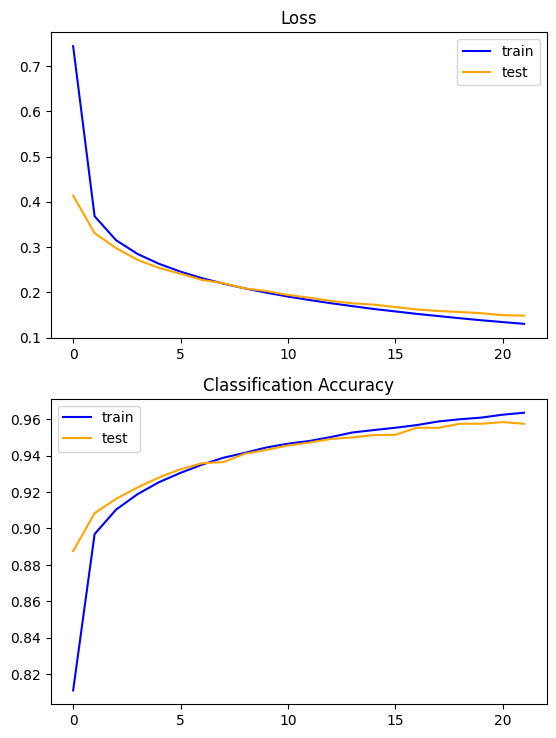

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
# plot loss
plt.title('Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='orange', label='test')
plt.legend()

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='orange', label='test')
plt.legend()

plt.subplots_adjust(bottom=0, top=1.4)

<h2>Ejemplo 2</h2>

En el siguiente ejemplo se realiza una clase que imprime la pérdida (*loss*) de cada *batch*, tanto en el conjunto de entrenamiento como en el de validación. Además, al final de cada *epoch* (época) se muestra el promedio de la pérdida y del *accuracy*.

**batch_size** es un hiperparametro que afecta la velocidad del entrenamiento, además de su *accuracy* y generalización. Como valor inicial se sugiere usar 32 o 64.


A continuación se calcula el número de batch por época a partir de la cantidad de imágenes en cada conjunto y del parámetro *batch_size*

In [ ]:
# Impresión del número de imagenes del conjunto de entrenamiento y validación
numimg_xtrain = X_train.shape[0]
numimg_xvalid = X_valid.shape[0]

print(f'Numero de imagenes para entrenamiento {numimg_xtrain}')
print(f'Numero de imagenes para validación {numimg_xvalid}')

BATCH_SIZE = 1024

print(f'Numero de lotes por epoca en el entrenamiento {numimg_xtrain//BATCH_SIZE}')
print(f'Numero de lotes por epoca en la validación {numimg_xvalid//BATCH_SIZE}')

Numero de imagenes para entrenamiento 48000
Numero de imagenes para validación 12000
Numero de lotes por epoca en el entrenamiento 46
Numero de lotes por epoca en la validación 11


In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=[28,28]))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(10, activation="softmax"))

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer = "SGD",
              metrics = ["accuracy"]
              )

In [ ]:
class LossAndAccuracyPrint(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            "Entrenamiento - En el batch {}, el promedio de la perdida es {:4.2f}".format(batch, logs["loss"])
        )

    def on_test_batch_end(self, batch, logs=None):
        print(
            "Validación - En el batch {}, el promedio de la perdida es {:4.2f} "
            "y el del accuracy es {:4.2f}".format(batch, logs["loss"], logs["accuracy"])
        )

    def on_epoch_end(self, epoch, logs=None):
        print(
            "El promedio de la pérdida en la epoca {} es {:4.2f} "
            "y el del accuracy es {:4.2f}\n".format(
                epoch, logs["loss"], logs["accuracy"]
            )
        )

In [ ]:
history2 = model2.fit(
    X_train, y_train,
    epochs=1,
    validation_data=(X_valid, y_valid),
    verbose=0,
    batch_size=BATCH_SIZE,
    callbacks=[LossAndAccuracyPrint()]
)

Entrenamiento - En el batch 0, el promedio de la perdida es 2.43
Entrenamiento - En el batch 1, el promedio de la perdida es 2.44
Entrenamiento - En el batch 2, el promedio de la perdida es 2.42
Entrenamiento - En el batch 3, el promedio de la perdida es 2.42
Entrenamiento - En el batch 4, el promedio de la perdida es 2.41
Entrenamiento - En el batch 5, el promedio de la perdida es 2.41
Entrenamiento - En el batch 6, el promedio de la perdida es 2.40
Entrenamiento - En el batch 7, el promedio de la perdida es 2.39
Entrenamiento - En el batch 8, el promedio de la perdida es 2.39
Entrenamiento - En el batch 9, el promedio de la perdida es 2.38
Entrenamiento - En el batch 10, el promedio de la perdida es 2.38
Entrenamiento - En el batch 11, el promedio de la perdida es 2.37
Entrenamiento - En el batch 12, el promedio de la perdida es 2.36
Entrenamiento - En el batch 13, el promedio de la perdida es 2.36
Entrenamiento - En el batch 14, el promedio de la perdida es 2.35
Entrenamiento - En e

<h2>Ejemplo 3</h2>

In [ ]:
model3 = Sequential()
model3.add(Flatten(input_shape=[28,28]))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(10, activation="softmax"))

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer = "SGD",
              metrics = ["accuracy"]
              )

In [ ]:
import numpy as np
class StopAtDiff(tf.keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(StopAtDiff, self).__init__()
        self.patience = patience

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        diff = logs.get("loss")-logs.get("val_loss")
        if (diff > 0) and (diff < self.best):
            self.best = diff
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("El entrenamiento del modelo se detuvo en la epoca %05d" % (self.stopped_epoch + 1))

class TrainMinusValPrint(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            "En la época {}  la diferencia de {:4.4f} - {:4.4f} es {:4.4f}".format(
                epoch, logs["loss"], logs["val_loss"], logs["loss"]-logs["val_loss"])
            )

In [ ]:
history3 = model3.fit(
    X_train, y_train,
    epochs = 200,
    validation_data = (X_valid, y_valid),
    verbose = 0,
    batch_size = 32,
    callbacks = [StopAtDiff(5), TrainMinusValPrint()]
)

En la época 0  la diferencia de 0.7618 - 0.4046 es 0.3573
En la época 1  la diferencia de 0.3618 - 0.3242 es 0.0376
En la época 2  la diferencia de 0.3085 - 0.2887 es 0.0198
En la época 3  la diferencia de 0.2780 - 0.2654 es 0.0126
En la época 4  la diferencia de 0.2549 - 0.2474 es 0.0075
En la época 5  la diferencia de 0.2364 - 0.2303 es 0.0061
En la época 6  la diferencia de 0.2209 - 0.2204 es 0.0006
En la época 7  la diferencia de 0.2077 - 0.2069 es 0.0008
En la época 8  la diferencia de 0.1960 - 0.1981 es -0.0021
En la época 9  la diferencia de 0.1859 - 0.1907 es -0.0049
En la época 10  la diferencia de 0.1767 - 0.1831 es -0.0064
En la época 11  la diferencia de 0.1687 - 0.1762 es -0.0075
El entrenamiento del modelo se detuvo en la epoca 00012


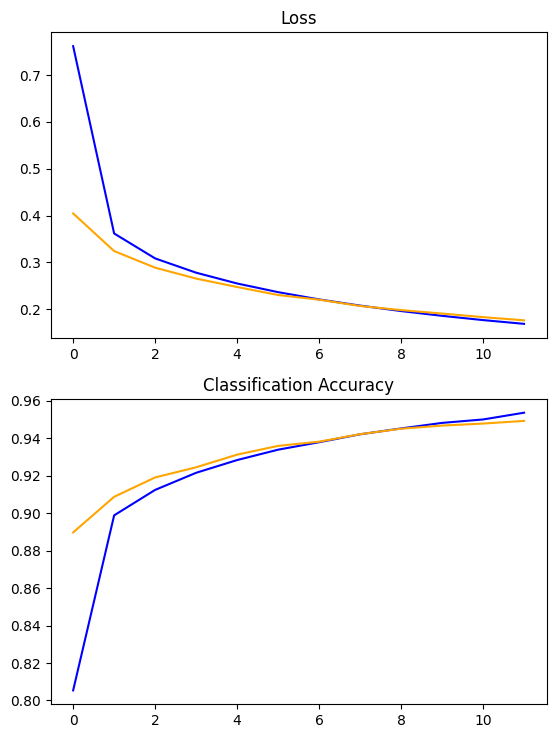

In [ ]:
plt.subplot(211)
# plot loss
plt.title('Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='test')

plt.subplots_adjust(bottom=0, top=1.4)

Referencias:
    </br>
    1. https://www.tensorflow.org/guide/keras/writing_your_own_callbacks
    </br>
    2. https://medium.com/data-science-365/determining-the-right-batch-size-for-a-neural-network-to-get-better-and-faster-results-7a8662830f15
    </br>
    3. https://www.linkedin.com/advice/0/what-best-batch-size-optimizing-deep-learning-kw4if
    